# Центральная предельная теорема своими руками

## Инструкция

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

## Распределение Лапласа

Распределение Лапласа (двойное экспоненциальное) — в теории вероятностей это непрерывное распределение случайной величины, при котором плотность вероятности есть $f(x) = {\frac {1}{2}}\,e^{-|x|}$, где $-\infty <x<+\infty$, $\alpha=1$, $\beta=0$  
Для него математическое ожидание равно $\beta=0$ и дисперсия равна $\frac{2}{\alpha^2}=2 $

Сгенерируем из него выборку объёма 1000.

In [1]:
import numpy as np
import scipy.stats as sts
from scipy.stats import laplace
import matplotlib.pyplot as plt

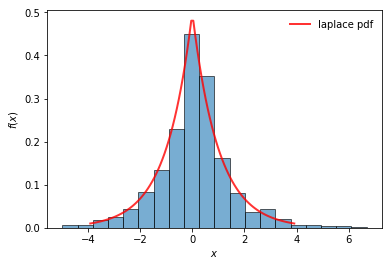

In [2]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(laplace.ppf(0.01), 
                laplace.ppf(0.99), 100)

# Строим плотность распределения
ax.plot(x, laplace.pdf(x),
       'r', lw=2, alpha=0.8, label='laplace pdf')

# Генерируем выборку объема 1000 и строим гисторамму
r = laplace.rvs(size=1000)
ax.hist(r, density=True, alpha=0.6, bins=20, edgecolor='k')
ax.legend(loc='best', frameon=False)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

### Функция, возвращающая 1000 выборочных средних для выборок заданного объема

In [3]:
def generate_Xn(n):
    '''n - объем выборки'''
    result = []
    for _ in range(1000):
        r = laplace.rvs(size=n)
        result.append(r.mean())
    return result

### Гистограмма и апроксимирующее нормальное распределение для n=5

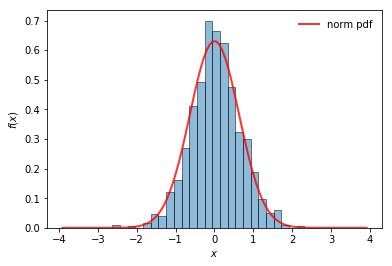

In [4]:
n = 5 #объем выборки
histogramma = generate_Xn(n) #массив выборочных средних для n=5

#Параметры нормального распределения согласно ЦПТ
mu = 0
sigma = (2/n)**0.5
norm_rv = sts.norm(loc=mu, scale=sigma)
pdf = norm_rv.pdf(x)

#Строим гистограмму и нормальное распределение
fig, ax = plt.subplots(1, 1)
ax.hist(histogramma, density=True, alpha=0.5, bins=25, edgecolor='k')
ax.plot(x, pdf, 'r', lw=2, alpha=0.8, label='norm pdf')
ax.legend(loc='best', frameon=False)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Точность апроксимации невысока.

### Гистограмма и апроксимирующее нормальное распределение для n=10

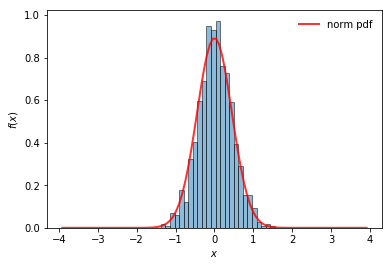

In [5]:
n = 10 #объем выборки
histogramma = generate_Xn(n) #массив выборочных средних для n=5

#Параметры нормального распределения согласно ЦПТ
mu = 0
sigma = (2/n)**0.5
norm_rv = sts.norm(loc=mu, scale=sigma)
pdf = norm_rv.pdf(x)

#Строим гистограмму и нормальное распределение
fig, ax = plt.subplots(1, 1)
ax.hist(histogramma, density=True, bins=25, alpha=0.5, edgecolor='k')
ax.plot(x, pdf, 'r', lw=2, alpha=0.8, label='norm pdf')
ax.legend(loc='best', frameon=False)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Точность апроксимации существенно выше, чем в предыдущем случае.

### Гистограмма и апроксимирующее нормальное распределение для n=50

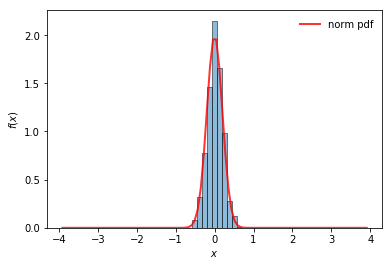

In [6]:
n = 50 #объем выборки
histogramma = generate_Xn(n) #массив выборочных средних для n=5

#Параметры нормального распределения согласно ЦПТ
mu = 0
sigma = (2/n)**0.5
norm_rv = sts.norm(loc=mu, scale=sigma)
pdf = norm_rv.pdf(x)

#Строим гистограмму и нормальное распределение
fig, ax = plt.subplots(1, 1)
ax.hist(histogramma, density=True, alpha=0.5, edgecolor='k')
ax.plot(x, pdf, 'r', lw=2, alpha=0.8, label='norm pdf')
ax.legend(loc='best', frameon=False)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Точность апроксимаци высокая.

### Вывод

С ростом размера выборки n точность аппроксимации распределения выборочных средних нормальным распределением растет.